# Lux Tutorial

Lux is a Python library that facilitate fast and easy data exploration by automating the visualization and data analysis process. By simply printing out a dataframe in a Jupyter notebook, Lux recommends a set of visualizations highlighting interesting trends and patterns in the dataset. Visualizations are displayed via an interactive widget that enables users to quickly browse through large collections of visualizations and make sense of their data.
https://github.com/lux-org/lux

## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import lux

%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

# MI Data

In [2]:
# IWB temp data from online source
weatherbuoy_df = pd.read_csv('https://erddap.marine.ie/erddap/tabledap/IWBNetwork.csvp?station_id%2Ctime%2CAtmosphericPressure%2CWindDirection%2CWindSpeed%2CWaveHeight%2CWavePeriod%2CSeaTemperature%2Csalinity')

# from local source
# weatherbuoy_df = pd.read_csv('data\IWBNetwork_archive.csv')

weatherbuoy_df['time (UTC)'] = pd.to_datetime(weatherbuoy_df['time (UTC)'])
weatherbuoy_df['year'] = weatherbuoy_df['time (UTC)'].dt.year
weatherbuoy_df['month'] = weatherbuoy_df['time (UTC)'].dt.month
weatherbuoy_df['day'] = weatherbuoy_df['time (UTC)'].dt.day
weatherbuoy_df['mean_yr_station'] = weatherbuoy_df.groupby(['year', 'station_id'])[
    "SeaTemperature (degrees_C)"].transform('mean')
weatherbuoy_df['min_yr_station'] = weatherbuoy_df.groupby(['year', 'station_id'])[
    "SeaTemperature (degrees_C)"].transform('min')
weatherbuoy_df['max_yr_station'] = weatherbuoy_df.groupby(['year', 'station_id'])[
    "SeaTemperature (degrees_C)"].transform('max')
# convert number months to the text months for easier display
weatherbuoy_df['months'] = weatherbuoy_df['time (UTC)'].dt.strftime('%b')

weatherbuoy_df.head()

/usr/local/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:448: UserWarning:
Lux detects that attributes ['year', 'month', 'day'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['year'] = pd.to_datetime(df['year'], format='<replace-with-datetime-format>')
	df['month'] = pd.to_datetime(df['month'], format='<replace-with-datetime-format>')
	df['day'] = pd.to_datetime(df['day'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If day is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'day':'quantitative'})
/usr/local/lib/python3.9/site-packages/lux

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
# IGFS Published Data
igfs_df = pd.read_csv('https://erddap.marine.ie/erddap/tabledap/imi_feas_obs_sp.csvp?Year%2CQuarter%2CICES_Area%2CGear_Code%2CScientific_Name%2CCommon_Name%2CAphiaID%2CDemersal_At_Sea_Scheme_Age_Observations%2CDemersal_At_Sea_Scheme_Biological_Observations%2CDemersal_At_Sea_Scheme_Length_Observations%2CPelagic_At_Sea_Scheme_Age_Observations%2CPelagic_At_Sea_Scheme_Biological_Observations%2CPelagic_At_Sea_Scheme_Length_Observations%2CNephrops_At_Sea_Scheme_Age_Observations%2CNephrops_At_Sea_Scheme_Biological_Observations%2CNephrops_At_Sea_Scheme_Length_Observations%2CPort_Sampling_Scheme_Age_Observations%2CPort_Sampling_Scheme_Biological_Observations%2CPort_Sampling_Scheme_Length_Observations')
igfs_df.head()

/usr/local/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Year' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Year'] = pd.to_datetime(df['Year'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If Year is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'Year':'quantitative'})
/usr/local/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Year' may be temporal.
To display visualizations for these attributes accurately, please convert te

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
# Tide Prediction Data
# Howth
tide_pred_df = pd.read_csv('https://erddap.marine.ie/erddap/tabledap/IMI-TidePrediction.csvp?time%2Clongitude%2Clatitude%2CstationID%2CWater_Level%2CWater_Level_ODM&time%3E=2022-01-01&time%3C=2025-01-01T00%3A20%3A00Z&stationID=%22Howth%22')

tide_pred_df['time (UTC)'] = pd.to_datetime(tide_pred_df['time (UTC)'])
tide_pred_df['year'] = tide_pred_df['time (UTC)'].dt.year
tide_pred_df['month'] = tide_pred_df['time (UTC)'].dt.month
tide_pred_df['day'] = tide_pred_df['time (UTC)'].dt.day
tide_pred_df['mean_yr_station'] = tide_pred_df.groupby(['year', 'stationID'])[
    "Water_Level (metres)"].transform('mean')
tide_pred_df['min_yr_station'] = tide_pred_df.groupby(['year', 'stationID'])[
    "Water_Level (metres)"].transform('min')
tide_pred_df['max_yr_station'] = tide_pred_df.groupby(['year', 'stationID'])[
    "Water_Level (metres)"].transform('max')
# convert number months to the text months for easier display
tide_pred_df['months'] = tide_pred_df['time (UTC)'].dt.strftime('%b')
tide_pred_df.head()

/usr/local/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:448: UserWarning:
Lux detects that attributes ['year', 'month', 'day'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['year'] = pd.to_datetime(df['year'], format='<replace-with-datetime-format>')
	df['month'] = pd.to_datetime(df['month'], format='<replace-with-datetime-format>')
	df['day'] = pd.to_datetime(df['day'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If day is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'day':'quantitative'})
/usr/local/lib/python3.9/site-packages/lux

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
# Wave Buoy Data
# AMETS Berth A 2021/2
wave_df = pd.read_csv('https://erddap.marine.ie/erddap/tabledap/IWaveBNetwork.csvp?time%2Cstation_id%2Cinstrument%2CPeakPeriod%2CPeakDirection%2CUpcrossPeriod%2CSignificantWaveHeight%2CSeaTemperature%2CHmax%2CTHmax%2CMeanCurDirTo%2CMeanCurSpeed&time%3E=2021-04-01&time%3C=2022-03-31&station_id=%22AMETS%20Berth%20A%20Wave%20Buoy%22')

wave_df['time (UTC)'] = pd.to_datetime(wave_df['time (UTC)'])
wave_df['year'] = wave_df['time (UTC)'].dt.year
wave_df['month'] = wave_df['time (UTC)'].dt.month
wave_df['day'] = wave_df['time (UTC)'].dt.day

# convert number months to the text months for easier display
wave_df['months'] = wave_df['time (UTC)'].dt.strftime('%b')
wave_df.head()

/usr/local/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:448: UserWarning:
Lux detects that attributes ['year', 'month', 'day'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['year'] = pd.to_datetime(df['year'], format='<replace-with-datetime-format>')
	df['month'] = pd.to_datetime(df['month'], format='<replace-with-datetime-format>')
	df['day'] = pd.to_datetime(df['day'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If day is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'day':'quantitative'})
/usr/local/lib/python3.9/site-packages/lux

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
# simplified data - one station
# m2 = Irish Sea
m2_df = weatherbuoy_df[(weatherbuoy_df.station_id == 'M2')]
# m5 = Celtic Sea
m5_df = weatherbuoy_df[(weatherbuoy_df.station_id == 'M5')]
# m6 = Mid Atlantic
m6_df = weatherbuoy_df[(weatherbuoy_df.station_id == 'M6')]

In [8]:
m6_df

/usr/local/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:448: UserWarning:
Lux detects that attributes ['year', 'month', 'day'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['year'] = pd.to_datetime(df['year'], format='<replace-with-datetime-format>')
	df['month'] = pd.to_datetime(df['month'], format='<replace-with-datetime-format>')
	df['day'] = pd.to_datetime(df['day'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If day is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'day':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Distribution Plot

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SignificantWaveHeight (cm)', ylabel='Density'>

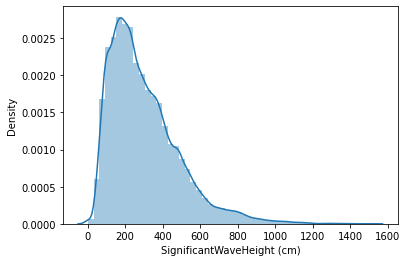

In [9]:
sns.distplot(wave_df['SignificantWaveHeight (cm)'])

### Joint Plot

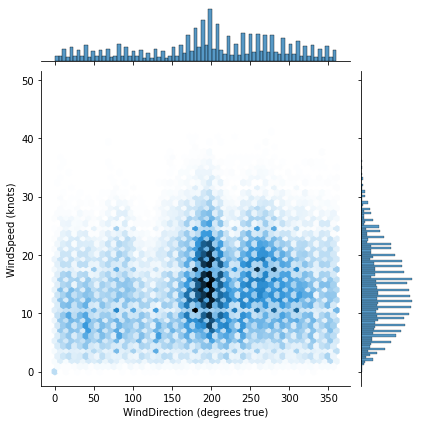

In [11]:
sns.jointplot(x='WindDirection (degrees true)', y='WindSpeed (knots)', data=m2_df, kind='hex')

### KDE Plot

<AxesSubplot:xlabel='Water_Level (metres)', ylabel='Density'>

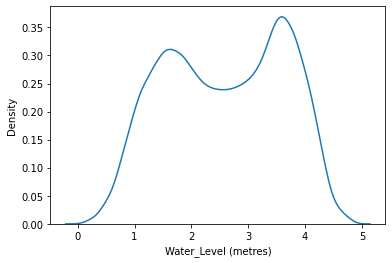

In [12]:
sns.kdeplot(tide_pred_df['Water_Level (metres)'])

### Pair Plots

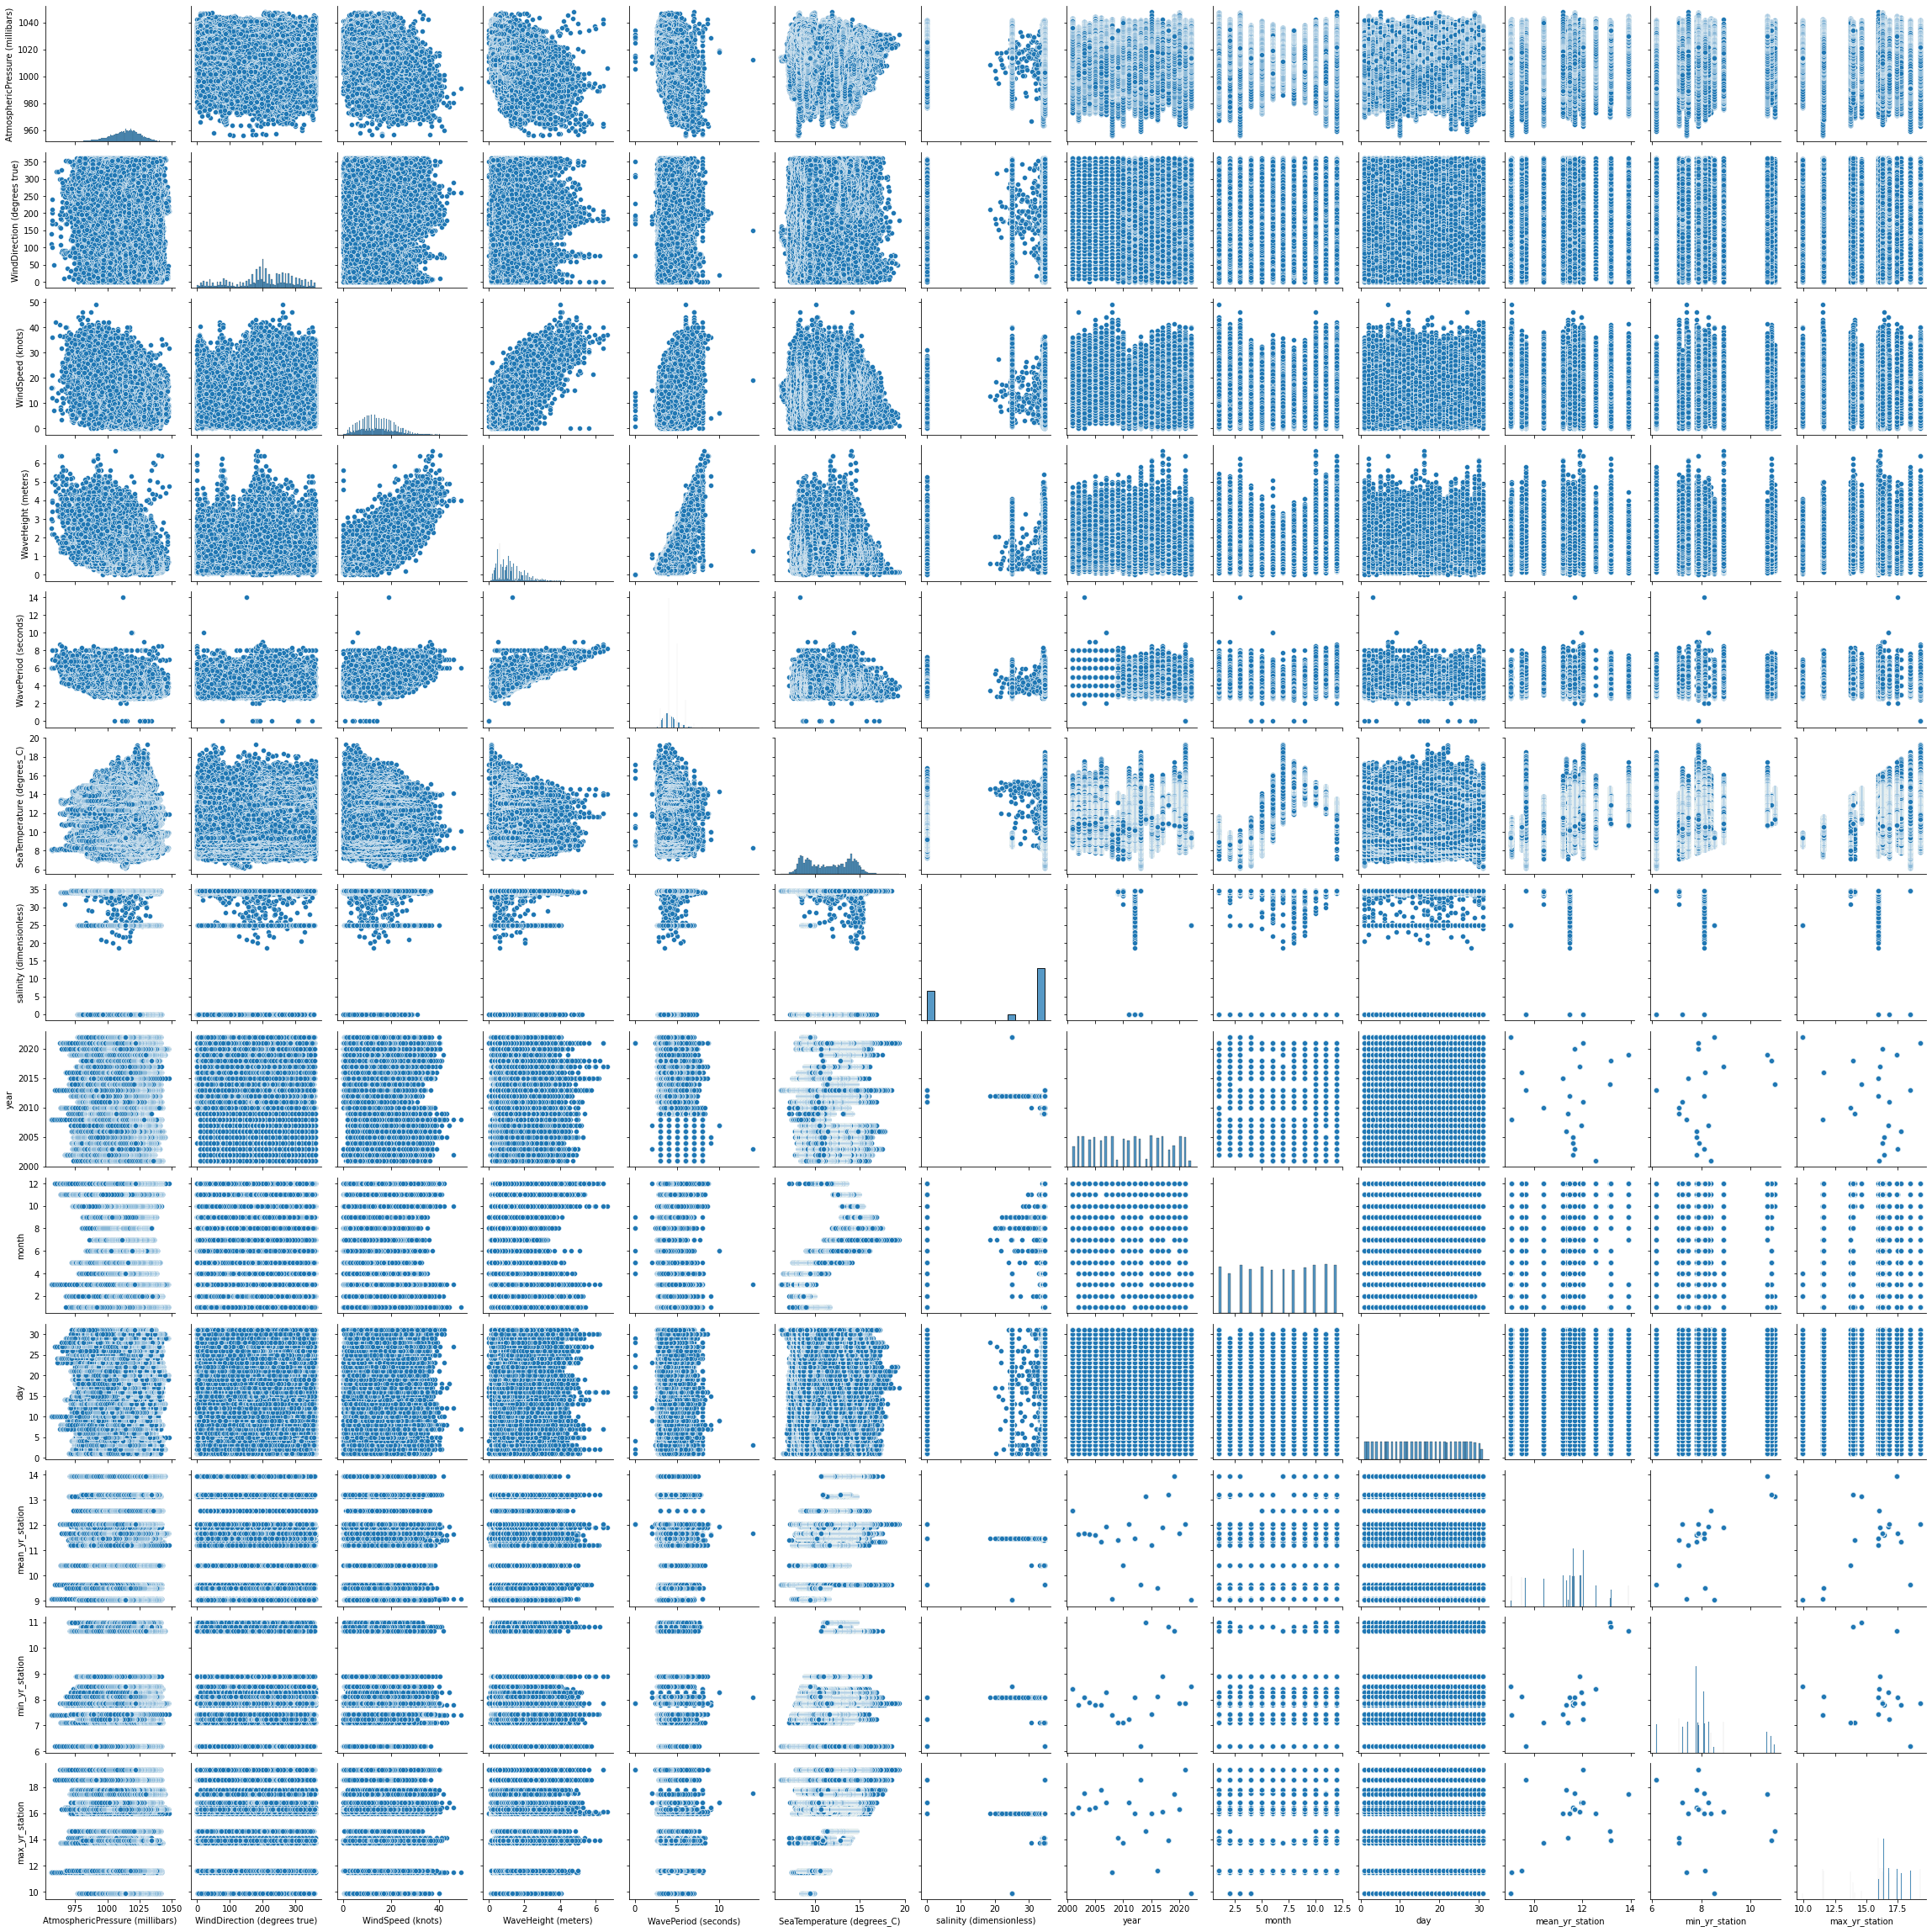

In [13]:
sns.pairplot(m2_df)

### Rug Plots

<AxesSubplot:xlabel='SignificantWaveHeight (cm)'>

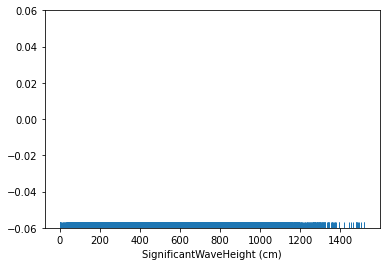

In [15]:
sns.rugplot(wave_df['SignificantWaveHeight (cm)'])

### Styling

<Figure size 1152x720 with 0 Axes>

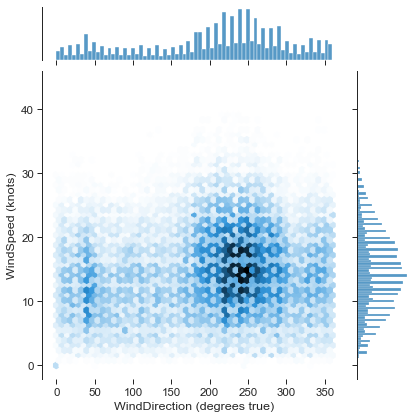

In [16]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('ticks')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(16,10))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.3)

sns.jointplot(x='WindDirection (degrees true)', y='WindSpeed (knots)', data=m5_df, kind='hex', palette='Reds')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=True)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='year', ylabel='WindSpeed (knots)'>

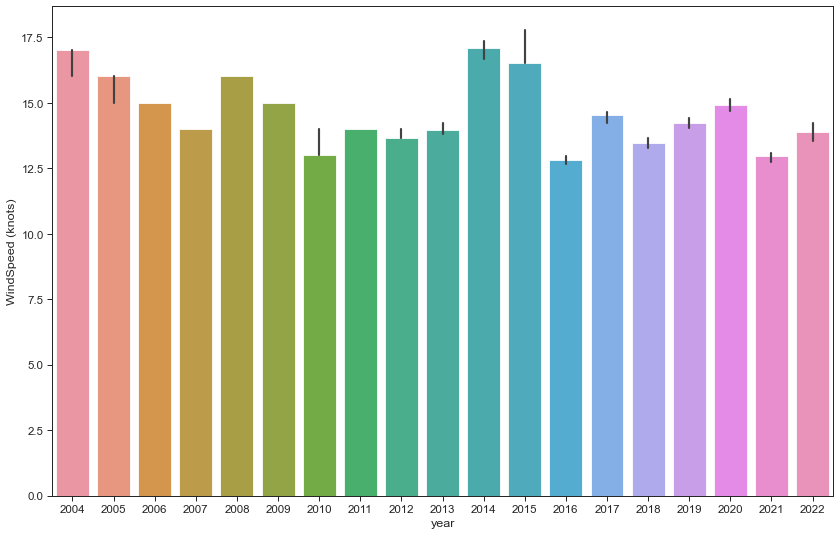

In [17]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
plt.figure(figsize=(14,9))

sns.barplot(x='year',y='WindSpeed (knots)',data=m5_df, estimator=np.median)

### Count Plot

<AxesSubplot:xlabel='count', ylabel='mean_yr_station'>

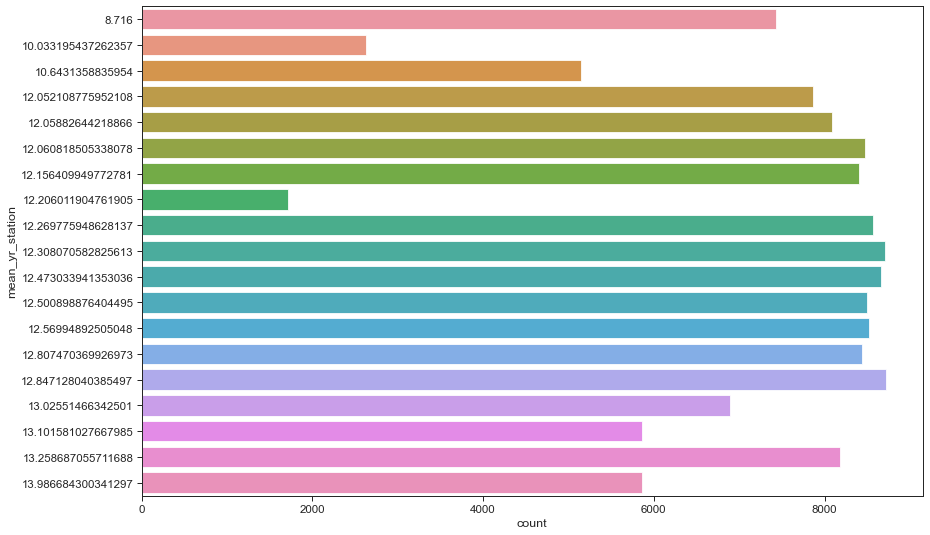

In [18]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
plt.figure(figsize=(14,9))

sns.countplot(y='mean_yr_station', data=m5_df)

### Matrix Plots

### Heatmaps

<AxesSubplot:>

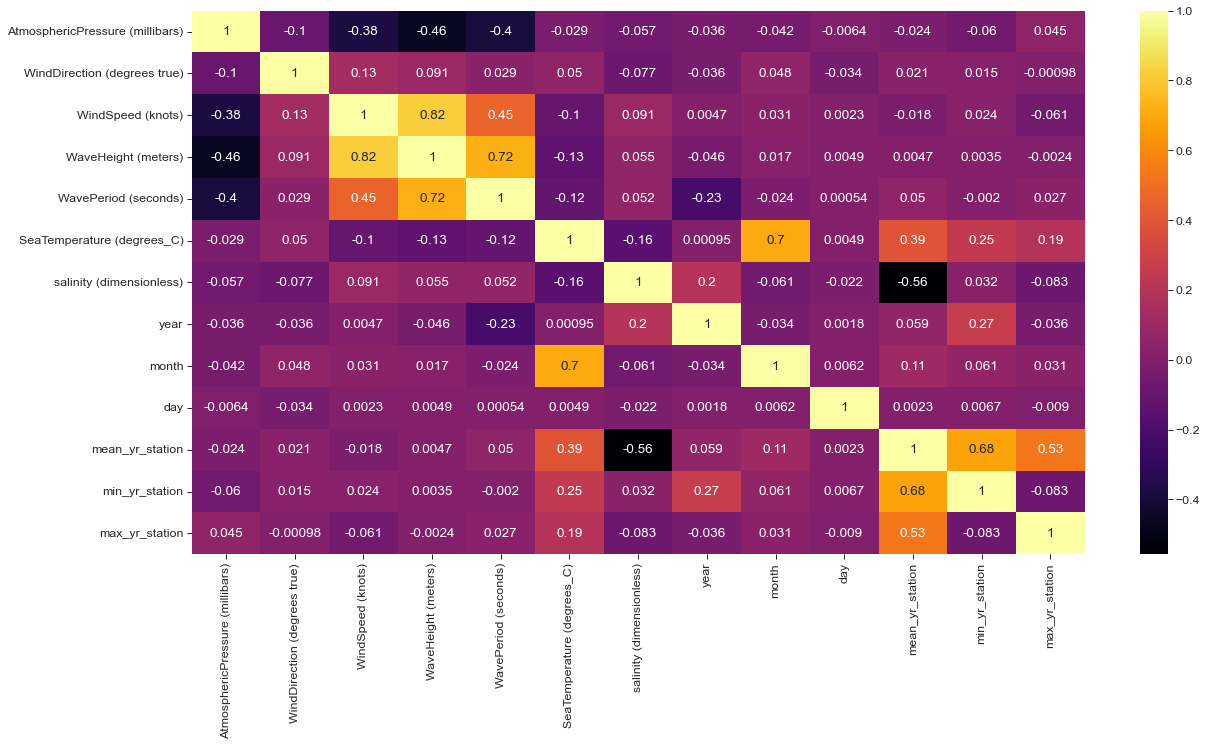

In [19]:
# Correlation of Weather Buoy variables
plt.figure(figsize=(20,10))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

m2_mx = m2_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(m2_mx, annot=True, cmap='inferno')

<AxesSubplot:>

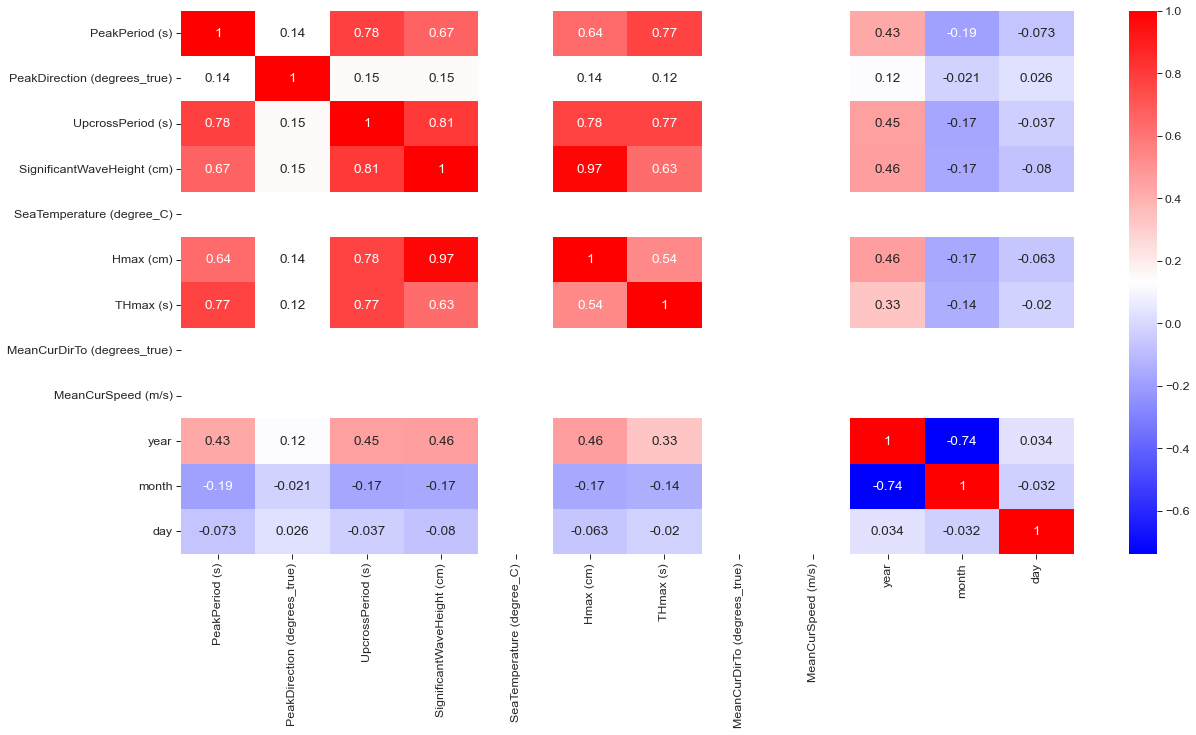

In [20]:
# Correlation of Wave Buoy variables
plt.figure(figsize=(20,10))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

wave_mx = wave_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(wave_mx, annot=True, cmap='bwr')

[Text(0.5, 1.0, 'Ireland Avg Sea Temperature')]

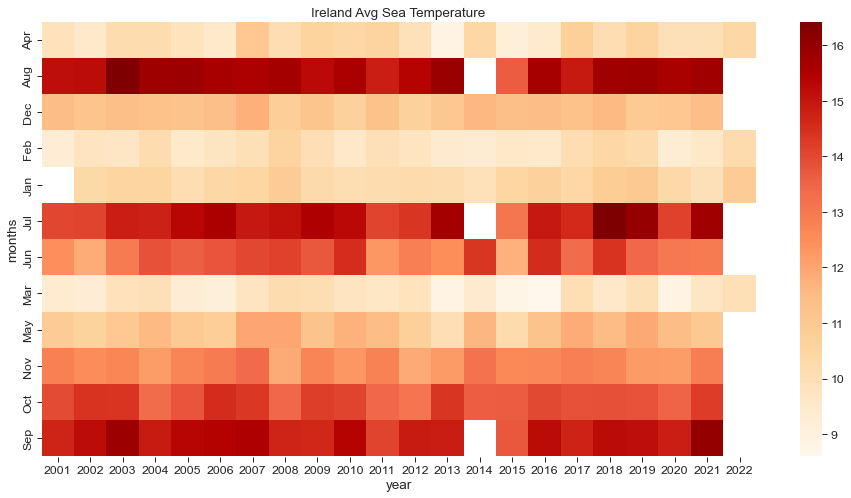

In [41]:
# Pivot Table showing temperature over the years by the months at a station
plt.figure(figsize=(16,8))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
temperature_by_year = weatherbuoy_df.pivot_table(index='months', columns='year', values='SeaTemperature (degrees_C)')
# You can separate data with lines
sns.heatmap(temperature_by_year, cmap='OrRd', linecolor='white', linewidth=0.001).set(title='Ireland Avg Sea Temperature')

[Text(0.5, 1.0, 'Celtic Sea Wind Speed')]

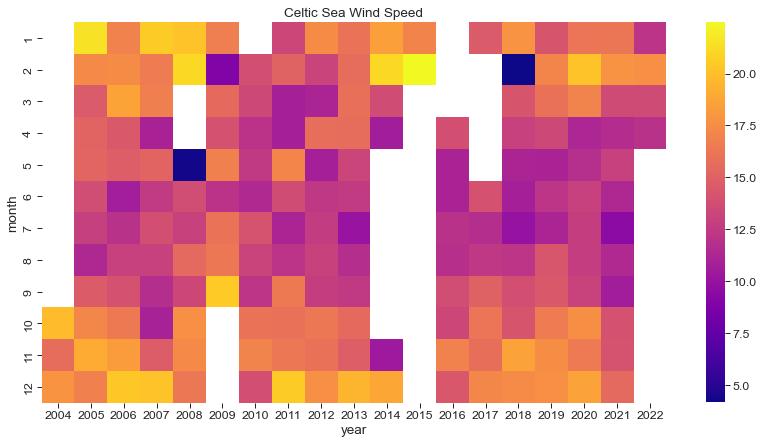

In [23]:
# Pivot Table showing wind speed over the years by the months at a station
plt.figure(figsize=(14,7))
sns.set_context('paper', font_scale=1.4)

# create a matrix with an index of month, columns representing years
wind_by_year = m5_df.pivot_table(index='month', columns='year', values='WindSpeed (knots)')
# separate data with lines
sns.heatmap(wind_by_year, cmap='plasma', linecolor='white', linewidth=0.0).set(title='Celtic Sea Wind Speed')

[Text(0.5, 1.0, 'Ireland Temperature Over Time')]

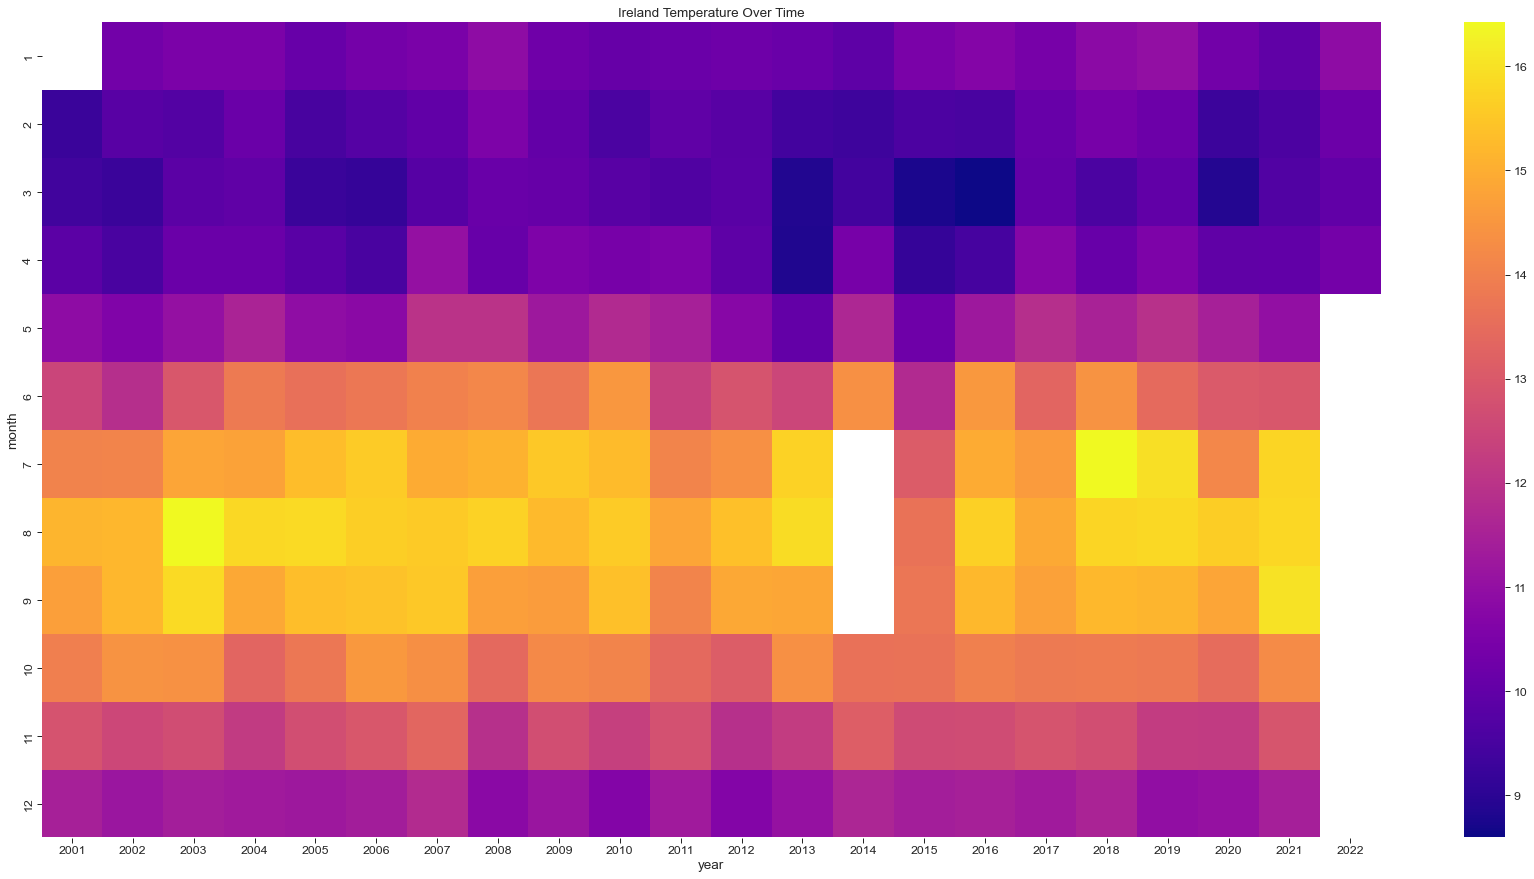

In [24]:
# Pivot Table showing wind speed over the years by the months at a station
plt.figure(figsize=(30,15))
sns.set_context('paper', font_scale=1.4)

# create a matrix with an index of month, columns representing years
temp_by_year = weatherbuoy_df.pivot_table(index='month', columns='year', values='SeaTemperature (degrees_C)')
# separate data with lines
sns.heatmap(temp_by_year, cmap='plasma', linecolor='black', linewidth=0.0).set(title='Ireland Temperature Over Time')

[Text(0.5, 1.0, 'Howth - Predicted Daily Tide Level')]

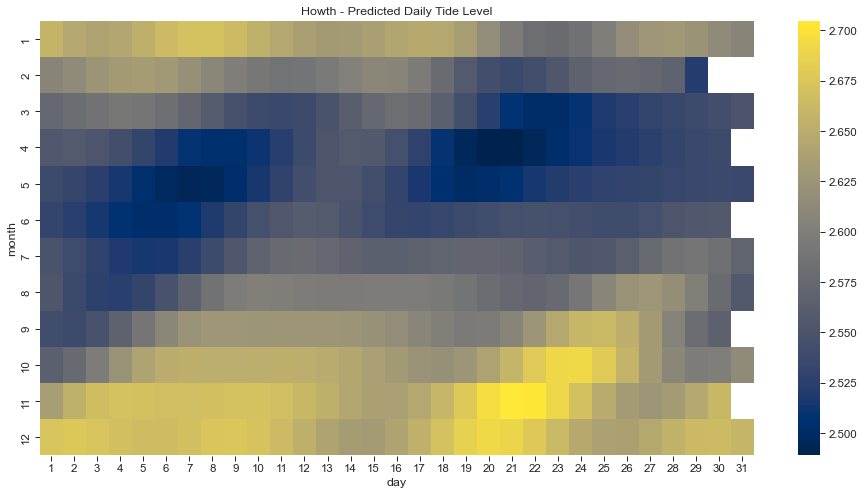

In [35]:
# Pivot Table showing temperature over the years by the months at a station
plt.figure(figsize=(16,8))
sns.set_context('paper', font_scale=1.3)

# create a matrix with an index of month, columns representing years
tides = tide_pred_df.pivot_table(index='month', columns='day', values='Water_Level (metres)')
# You can separate data with lines
sns.heatmap(tides, cmap='cividis', linewidth=0.003).set(title='Howth - Predicted Daily Tide Level')

### Cluster Map

<Figure size 2160x1080 with 0 Axes>

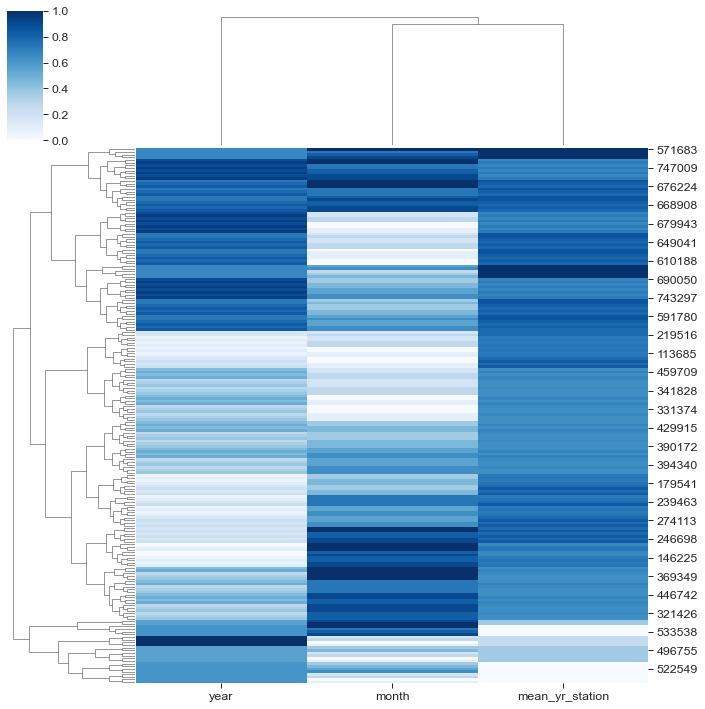

In [26]:
plt.figure(figsize=(30,15))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)

m5_simplified = m5_df[['year', 'month', 'mean_yr_station']].copy()
m5_simplified = m5_simplified.drop_duplicates()
# m5_simplified['months'] = m5_simplified['months'].astype("category")
# m5_simplified['mean_yr_station'] = m5_simplified['mean_yr_station'].astype("int64")
# m5_simplified.dtypes
# flights=sns.load_dataset("flights")
# flights
# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
# sns.clustermap(flights,cmap="Blues", standard_scale=1)
sns.clustermap(m5_simplified, cmap="Blues", standard_scale=1)

### PairGrid

<Figure size 576x432 with 0 Axes>

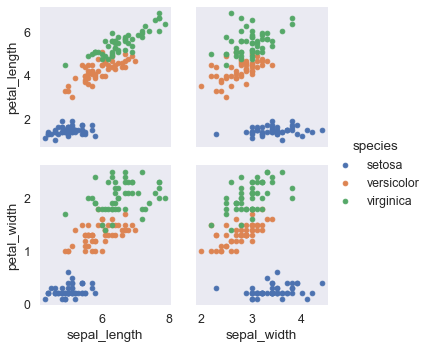

In [39]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend()

### Facet Grid

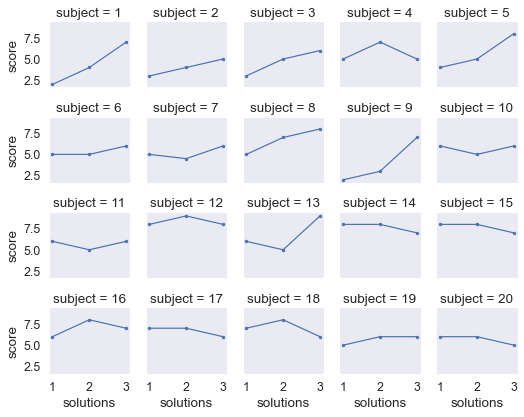

In [40]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

### Regression Plots

In [41]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

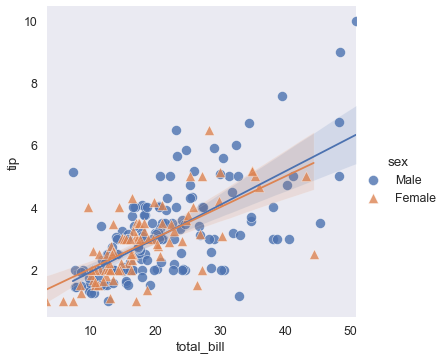

In [42]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

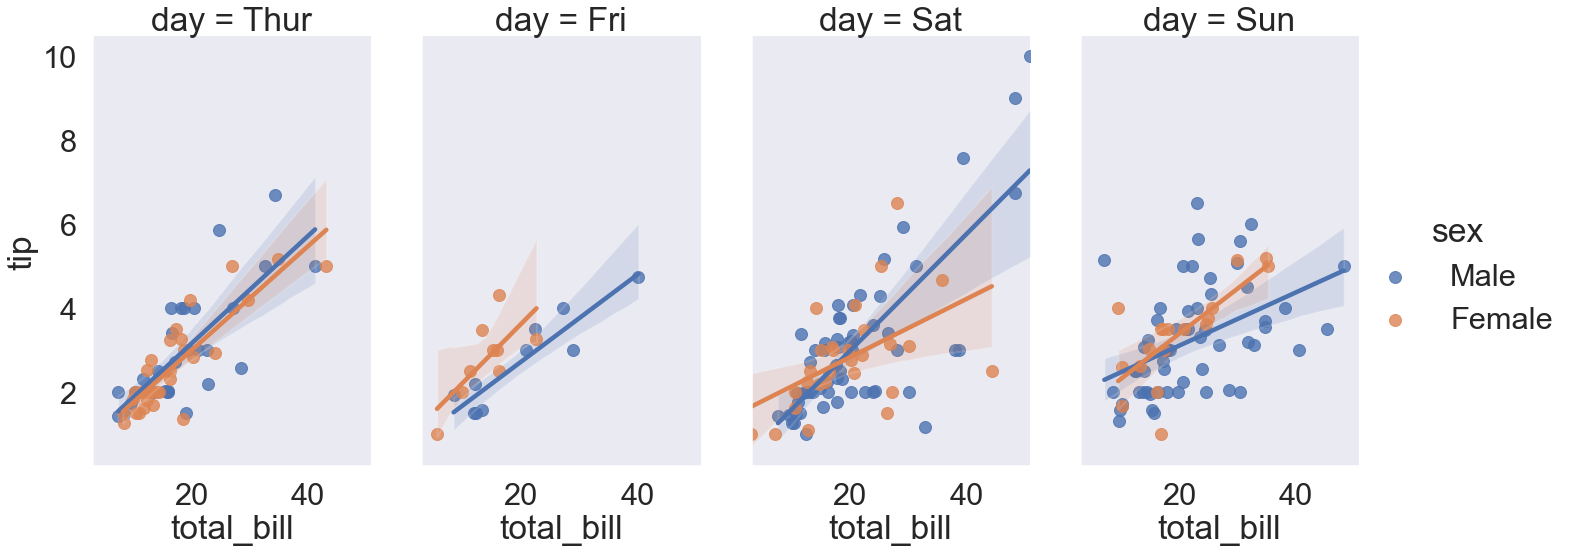

In [43]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)

## Ridge Plots

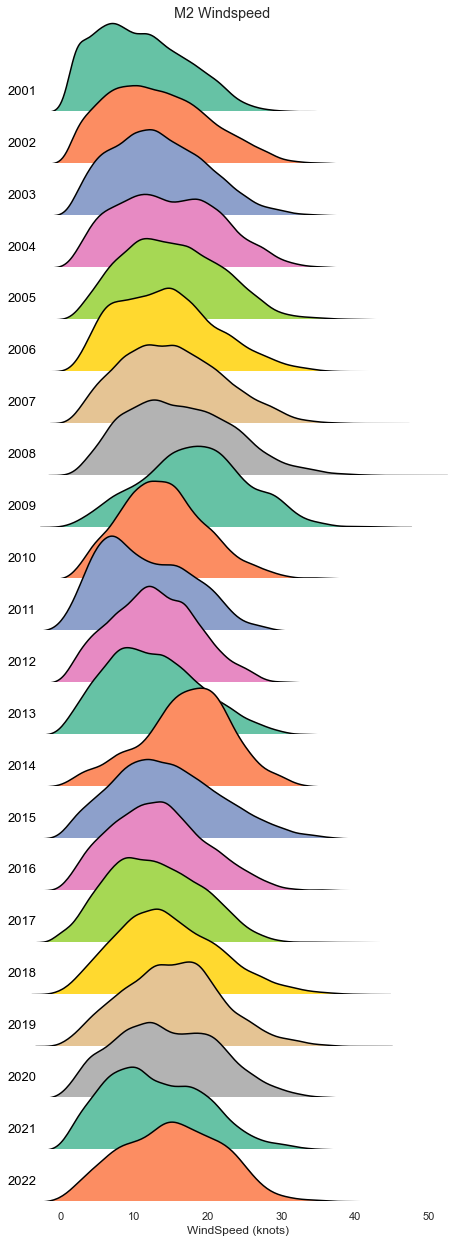

In [57]:
# csv = "..\data\ifba.csv"
# df = pd.read_csv(csv)
# Theme
sns.set_theme(style="dark", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)# create a grid with a row for each 'Language'
g = sns.FacetGrid(m2_df, palette=palette, row="year", hue="year", aspect=9, height=0.8) # map df - Kernel Density Plot of IMDB Score for each Language
g.map_dataframe(sns.kdeplot, x="WindSpeed (knots)", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="WindSpeed (knots)", color='black')# function to draw labels
def label(x, color, label):
    ax = plt.gca() #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
    ha="left", va="center", transform=ax.transAxes)
# iterate grid to plot labels
g.map(label, "year")# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)# remove subplot titles
g.set_titles("")# remove yticks and set xlabel
g.set(yticks=[], xlabel="WindSpeed (knots)")
# remove left spine
g.despine(left=True)
# set title
plt.suptitle('M2 Windspeed', y=0.98)
plt.savefig('ridgeplot.png')

Text(0.5, 0.98, 'Significant Wave Height')

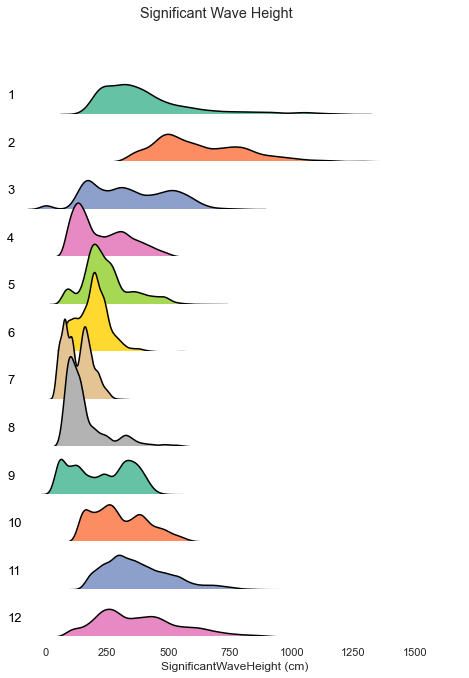

In [17]:
sns.set_theme(style="dark", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)# create a grid with a row for each 
g = sns.FacetGrid(wave_df, palette=palette, row="month", hue="month", aspect=9, height=0.8) 
# map df - Kernel Density Plot
g.map_dataframe(sns.kdeplot, x="SignificantWaveHeight (cm)", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="SignificantWaveHeight (cm)", color='black')# function to draw labels
def label(x, color, label):
    ax = plt.gca()
    #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
    ha="left", va="center", transform=ax.transAxes)
# iterate grid to plot labels
g.map(label, "month")# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)# remove subplot titles
g.set_titles("")# remove yticks and set xlabel
g.set(yticks=[], xlabel="SignificantWaveHeight (cm)")
# remove left spine
g.despine(left=True)
# set title
plt.suptitle('Significant Wave Height', y=0.98)
# plt.savefig('ridgeplot.png')

C:\tools\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\tools\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\tools\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


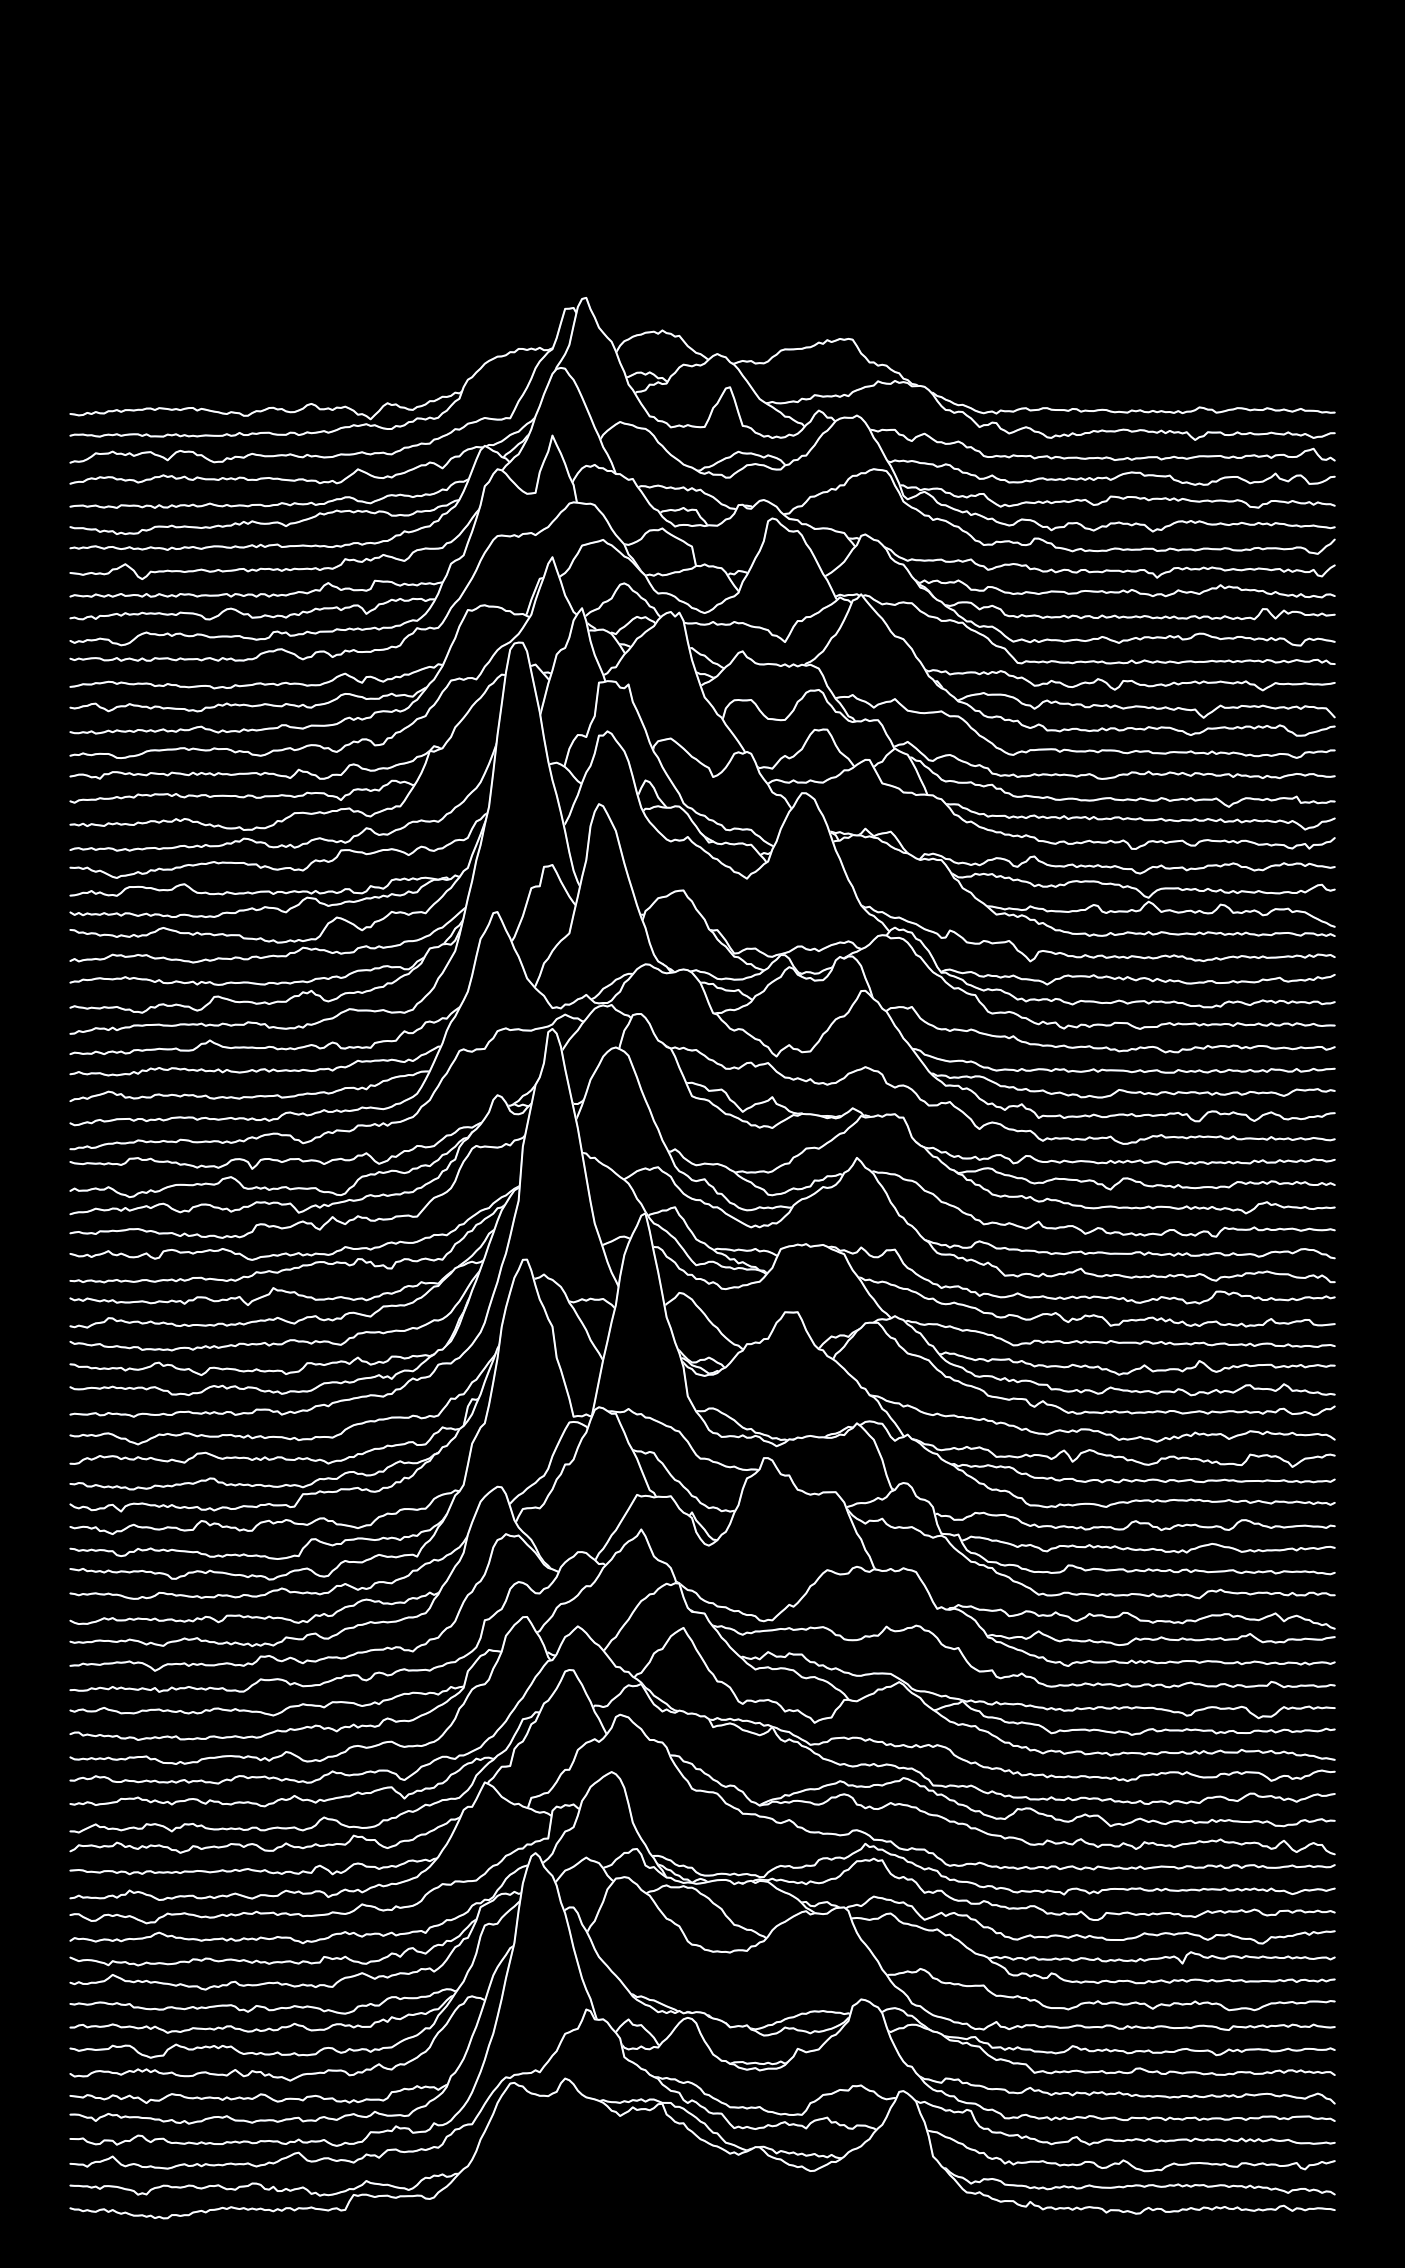

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://gist.githubusercontent.com/borgar/31c1e476b8e92a11d7e9/raw/0fae97dab6830ecee185a63c1cee0008f6778ff6/pulsar.csv"
df = pd.read_csv(url, header=None)
df = df.stack().reset_index()
df.columns = ['idx', 'x', 'y']
# df.to_csv('joy.csv')
sns.set_theme(rc={"axes.facecolor": (0, 0, 0, 0), 'figure.facecolor':'#000000', 'axes.grid':False})
g = sns.FacetGrid(df, row='idx', aspect=50, height=0.4)# Draw the densities in a few steps
g.map(sns.lineplot, 'x', 'y', clip_on=False, alpha=1, linewidth=1.5)
g.map(plt.fill_between, 'x', 'y', color='#000000')
g.map(sns.lineplot, 'x', 'y', clip_on=False, color='#ffffff', lw=2)# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.95)
g.set_titles("")
g.set(yticks=[], xticks=[], ylabel="", xlabel="")
g.despine(bottom=True, left=True)
# plt.savefig('joy.png', facecolor='#000000')